**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import preprocessing

# import data 2C_weka.csv for 2 Class Classifcation.


In [4]:
df_2CWeka = pd.read_csv('2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [5]:
# 1) Look at the head of dataset.
df_2CWeka.head

<bound method NDFrame.head of      pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027818            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
5           40.250200            13.921907              25.124950   
6           53.432928            15.864336              37.165934   
7           45.366754            10.755611              29.038349   
8           43.790190            13.533753              42.690814   
9           36.686353             5.010884              41.948751   
10          49.706610            13.040974              31.334500   
11          31.232387            17.715819              15.500000   
12          48.915551            19.964556              40.263794   
13  

In [6]:
# 2) Look at the tail of dataset.
df_2CWeka.tail

<bound method NDFrame.tail of      pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027818            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
5           40.250200            13.921907              25.124950   
6           53.432928            15.864336              37.165934   
7           45.366754            10.755611              29.038349   
8           43.790190            13.533753              42.690814   
9           36.686353             5.010884              41.948751   
10          49.706610            13.040974              31.334500   
11          31.232387            17.715819              15.500000   
12          48.915551            19.964556              40.263794   
13  

In [7]:
# 3) Checking the presence of missing values. 
print("Checking the presence of missing values :", df_2CWeka.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB
Checking the presence of missing values : None


In [8]:
# 4) Look at the unique values of class values. 
df_2CWeka['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

2Classdata


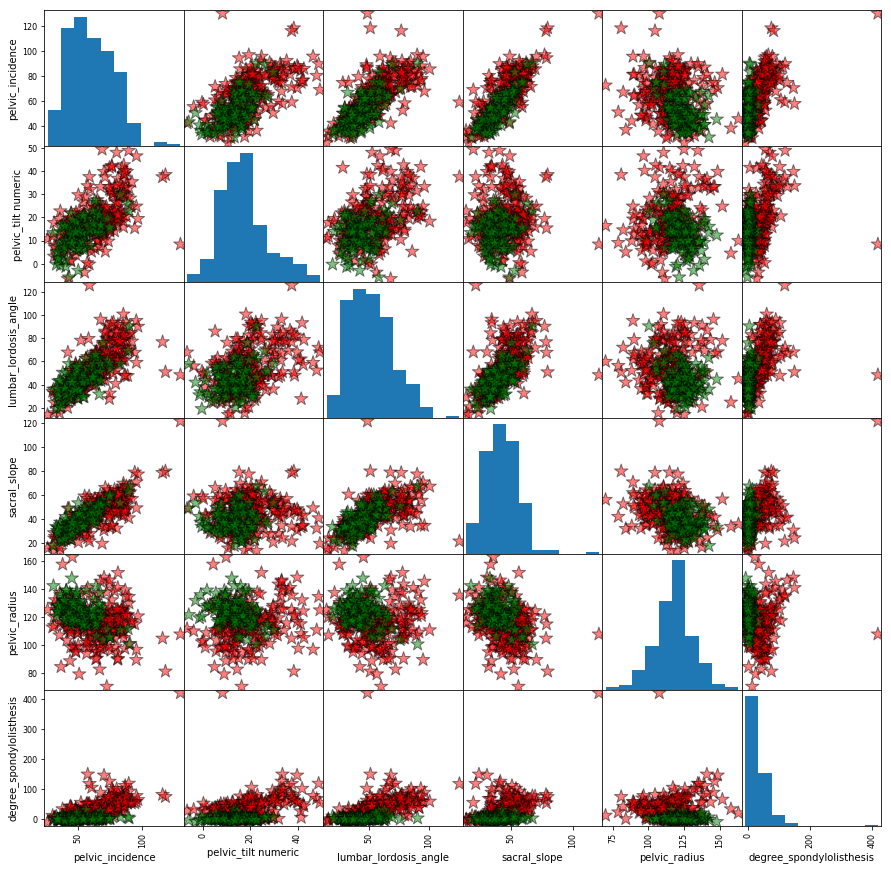

In [9]:
# 5) Look at the distribution of class values and other attributes.


print("2Classdata")
color_list = ['red' if i == 'Abnormal' else 'green' for i in df_2CWeka.loc[:,'class']]
pd.plotting.scatter_matrix(df_2CWeka.loc[:,df_2CWeka.columns!='class'],
                                        c = color_list,
                                        figsize=[15,15],
                                        diagonal = 'hist',
                                        alpha = 0.5,
                                        s = 200,
                                        marker = '*',
                                        edgecolor = 'black')

plt.show()

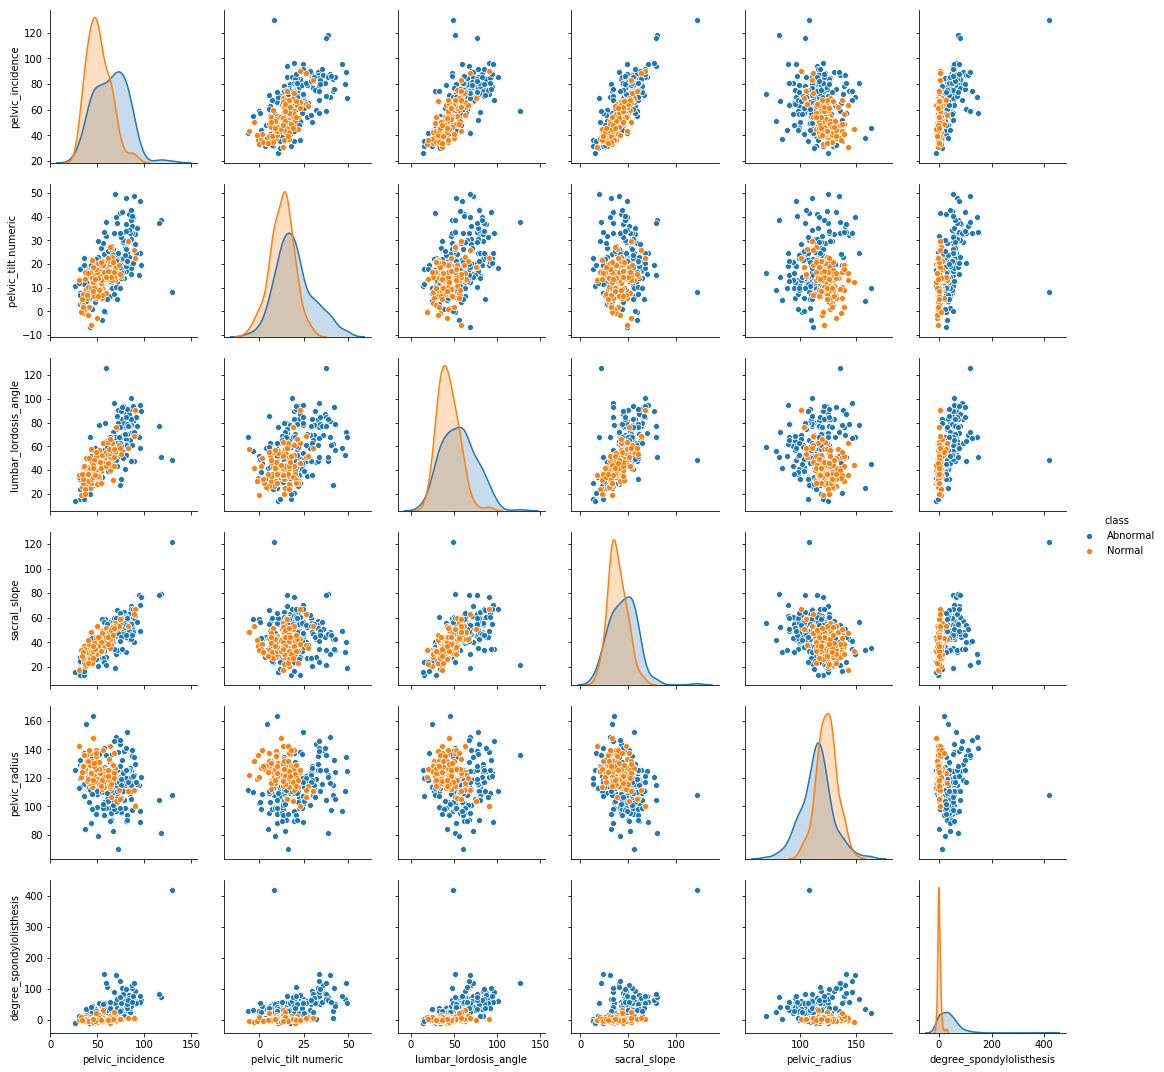

In [120]:
# 5) Look at the distribution of class values and other attributes. (Just checked the result with earlier code with pairplots)
sns.pairplot(df_2CWeka, hue='class')

In [10]:
# 6.1) Get the datatype information about the dataset.
print(df_2CWeka.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB
None


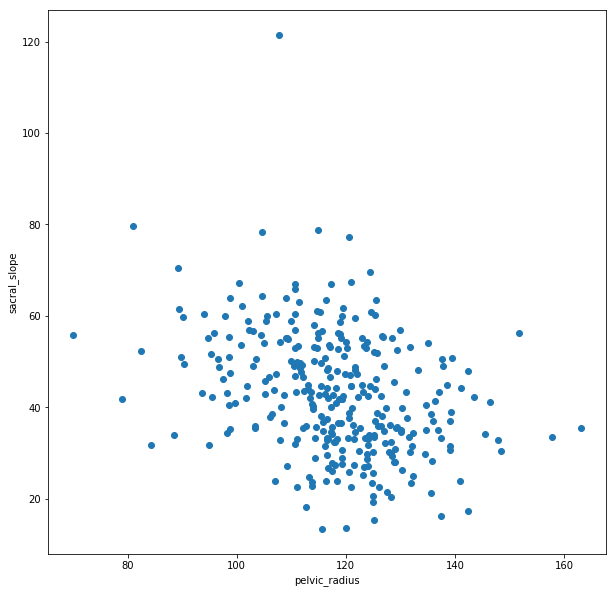

In [11]:
# 6.2) Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.
x = np.array(df_2CWeka.loc[:,'pelvic_radius']).reshape(-1,1)
y = np.array(df_2CWeka.loc[:,'sacral_slope']).reshape(-1,1)

# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_radius')
plt.ylabel('sacral_slope')
plt.show()

# Encode the Class variable to integer.

In [12]:
print("Class : ",df_2CWeka['class'].unique())
df_2CWeka.replace(['Abnormal', 'Normal'], [1,2])

Class :  ['Abnormal' 'Normal']


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [21]:
X=df_2CWeka.iloc[:,0:6].values
y=df_2CWeka['class'].values
X

array([[ 63.0278175 ,  22.55258597,  39.60911701,  40.47523153,
         98.67291675,  -0.25439999],
       [ 39.05695098,  10.06099147,  25.01537822,  28.99595951,
        114.4054254 ,   4.56425864],
       [ 68.83202098,  22.21848205,  50.09219357,  46.61353893,
        105.9851355 ,  -3.53031731],
       ...,
       [ 61.44659663,  22.6949683 ,  46.17034732,  38.75162833,
        125.6707246 ,  -2.70787952],
       [ 45.25279209,   8.69315736,  41.5831264 ,  36.55963472,
        118.5458418 ,   0.21475017],
       [ 33.84164075,   5.07399141,  36.64123294,  28.76764934,
        123.9452436 ,  -0.19924909]])

# Normalize your Data (X) to get values between 0 to 1.

In [24]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
#X=(X-np.min(X))/(np.max(X)/np.min(X))             (For own reference in future)
X

array([[ 0.14708636,  0.50136873, -0.6651769 , -0.18495031, -1.4476468 ,
        -0.70805942],
       [-1.24586434, -0.74876898, -1.45300075, -1.0415207 , -0.26438488,
        -0.57955637],
       [ 0.4843695 ,  0.46793218, -0.09926175,  0.2730833 , -0.89768556,
        -0.79542095],
       ...,
       [ 0.05520137,  0.51561812, -0.31097748, -0.31356364,  0.58289256,
        -0.77348834],
       [-0.88582307, -0.88565951, -0.55861259, -0.47712775,  0.04702109,
        -0.69554822],
       [-1.54892681, -1.24785954, -0.82539423, -1.05855695,  0.45311695,
        -0.70658867]])

# Split the dat as train and test with a ratio of 70:30.

In [49]:
# Train Test Split.  
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [60]:
# Training.
from sklearn.neighbors import KNeighborsClassifier

neigh= KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)

In [61]:
# Prediction.
y_Prediction = neigh.predict(X_test)
print(y_Prediction)

['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Normal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal']


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [62]:
# Accuracy Evaluation
from sklearn import metrics
print("Train Set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test Set Accuracy: ",metrics.accuracy_score(y_test,y_Prediction))

Train Set Accuracy:  0.9170506912442397
Test Set Accuracy:  0.7741935483870968


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

No handles with labels found to put in legend.


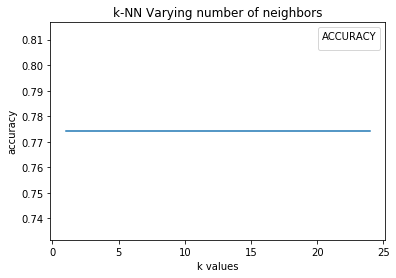

In [63]:
accuracy_list= []
for each in range(1,25):
    neigh_fit= KNeighborsClassifier(n_neighbors=each).fit(X_train,y_train)
    y_Prediction=neigh_fit.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test,yhat))

plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,25),accuracy_list)
plt.legend(loc='best',title="ACCURACY")
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [65]:
df_3CWeka = pd.read_csv('3Classdata.csv')

In [67]:
# 1) Look at the head of dataset.
df_3CWeka.head

<bound method NDFrame.head of      pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027818    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
5           40.250200    13.921907              25.124950     26.328293   
6           53.432928    15.864336              37.165934     37.568592   
7           45.366754    10.755611              29.038349     34.611142   
8           43.790190    13.533753              42.690814     30.256437   
9           36.686353     5.010884              41.948751     31.675469   
10          49.706610    13.040974              31.334500     36.665635   
11          31.232387    17.715819              15.500000     13.51656

In [69]:
# 2) Look at the tail of dataset.
df_3CWeka.tail

<bound method NDFrame.tail of      pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027818    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
5           40.250200    13.921907              25.124950     26.328293   
6           53.432928    15.864336              37.165934     37.568592   
7           45.366754    10.755611              29.038349     34.611142   
8           43.790190    13.533753              42.690814     30.256437   
9           36.686353     5.010884              41.948751     31.675469   
10          49.706610    13.040974              31.334500     36.665635   
11          31.232387    17.715819              15.500000     13.51656

In [71]:
# 3) Checking the presence of missing values. 
print("Checking the presence of missing values :", df_3CWeka.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB
Checking the presence of missing values : None


In [73]:
# 4) Look at the unique values of class values. 
df_3CWeka['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

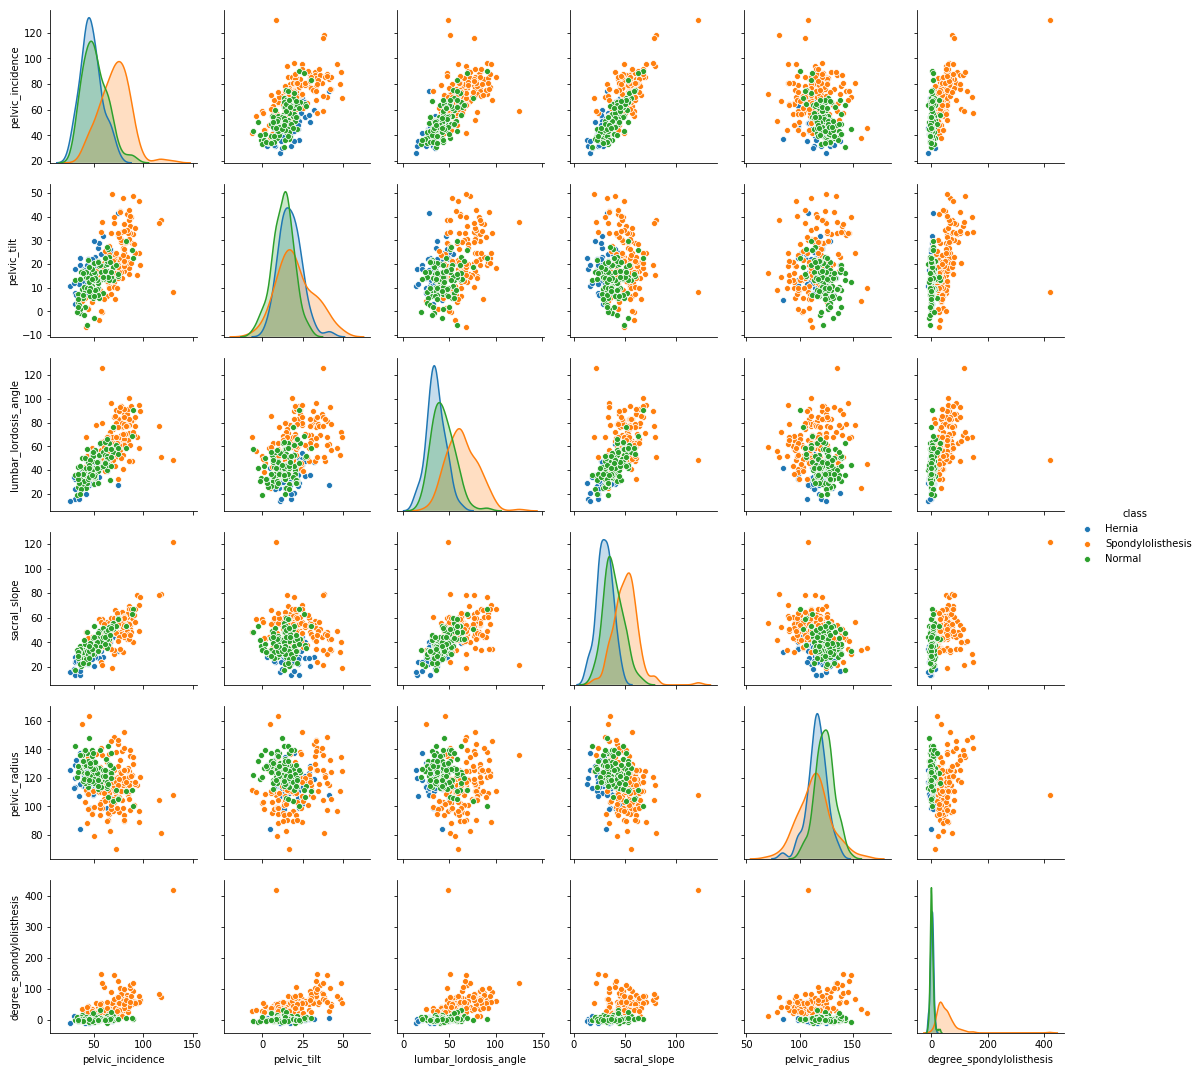

In [91]:
# 5) Look at the distribution of class values and other attributes.

sns.pairplot(df_3CWeka, hue='class')

In [95]:
# 6.1) Get the datatype information about the dataset.
print(df_3CWeka.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB
None


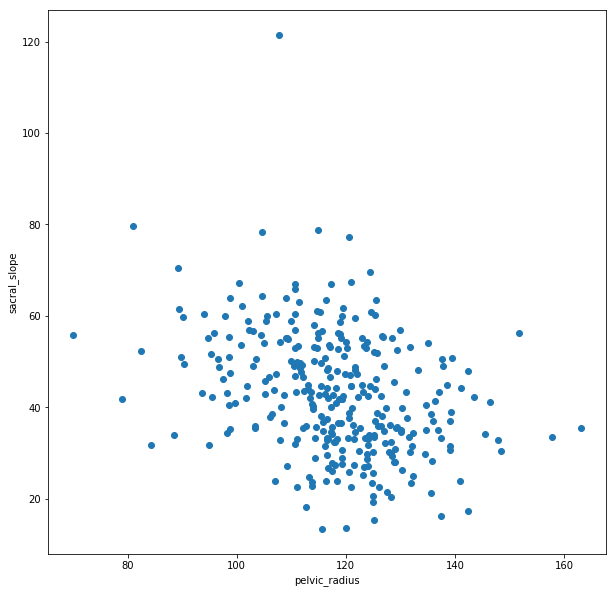

In [97]:
# 6.2) Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.
x = np.array(df_3CWeka.loc[:,'pelvic_radius']).reshape(-1,1)
y = np.array(df_3CWeka.loc[:,'sacral_slope']).reshape(-1,1)

# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_radius')
plt.ylabel('sacral_slope')
plt.show()

In [101]:
print("Class : ",df_3CWeka['class'].unique())
df_3CWeka.replace(['Hernia', 'Spondylolisthesis', 'Normal'], [1,2,3])

Class :  ['Hernia' 'Spondylolisthesis' 'Normal']


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1


In [111]:
X=df_3CWeka.iloc[:,0:6].values
y=df_3CWeka['class'].values
X

array([[ 63.0278175 ,  22.55258597,  39.60911701,  40.47523153,
         98.67291675,  -0.25439999],
       [ 39.05695098,  10.06099147,  25.01537822,  28.99595951,
        114.4054254 ,   4.56425864],
       [ 68.83202098,  22.21848205,  50.09219357,  46.61353893,
        105.9851355 ,  -3.53031731],
       ...,
       [ 61.44659663,  22.6949683 ,  46.17034732,  38.75162833,
        125.6707246 ,  -2.70787952],
       [ 45.25279209,   8.69315736,  41.5831264 ,  36.55963472,
        118.5458418 ,   0.21475017],
       [ 33.84164075,   5.07399141,  36.64123294,  28.76764934,
        123.9452436 ,  -0.19924909]])

In [109]:
# Normalize your Data (X) to get values between 0 to 1.
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
#X=(X-np.min(X))/(np.max(X)/np.min(X))             (For own reference in future)
XX

array([[ 0.14708636,  0.50136873, -0.6651769 , -0.18495031, -1.4476468 ,
        -0.70805942],
       [-1.24586434, -0.74876898, -1.45300075, -1.0415207 , -0.26438488,
        -0.57955637],
       [ 0.4843695 ,  0.46793218, -0.09926175,  0.2730833 , -0.89768556,
        -0.79542095],
       ...,
       [ 0.05520137,  0.51561812, -0.31097748, -0.31356364,  0.58289256,
        -0.77348834],
       [-0.88582307, -0.88565951, -0.55861259, -0.47712775,  0.04702109,
        -0.69554822],
       [-1.54892681, -1.24785954, -0.82539423, -1.05855695,  0.45311695,
        -0.70658867]])

In [113]:
# Split the dat as train and test with a ratio of 70:30. 
# Train Test Split.  
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [114]:
# Training.
from sklearn.neighbors import KNeighborsClassifier

neigh= KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)

In [116]:
# Prediction.
y_Prediction = neigh.predict(X_test)
print(y_Prediction)

['Spondylolisthesis' 'Normal' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Normal' 'Spondylolisthesis'
 'Spondylolisthesis' 'Normal' 'Hernia' 'Normal' 'Hernia' 'Hernia' 'Normal'
 'Spondylolisthesis' 'Normal' 'Normal' 'Hernia' 'Spondylolisthesis'
 'Hernia' 'Normal' 'Hernia' 'Spondylolisthesis' 'Normal'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis' 'Normal'
 'Spondylolisthesis' 'Spondylolisthesis' 'Normal' 'Normal' 'Normal'
 'Normal' 'Spondylolisthesis' 'Hernia' 'Hernia' 'Spondylolisthesis'
 'Spondylolisthesis' 'Normal' 'Normal' 'Spondylolisthesis' 'Normal'
 'Spondylolisthesis' 'Spondylolisthesis' 'Normal' 'Hernia'
 'Spondylolisthesis' 'Normal' 'Hernia' 'Normal' 'Hernia'
 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia' 'Spondylolisthesis'
 'Spondylolisthesis' 'Hernia' 'Spondylolisthesis' 'Normal'
 'Spondylolisthesis' 'Hernia' 'Hernia' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 

In [118]:
# Accuracy Evaluation
from sklearn import metrics
print("Train Set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test Set Accuracy: ",metrics.accuracy_score(y_test,y_Prediction))

Train Set Accuracy:  0.8986175115207373
Test Set Accuracy:  0.8387096774193549


No handles with labels found to put in legend.


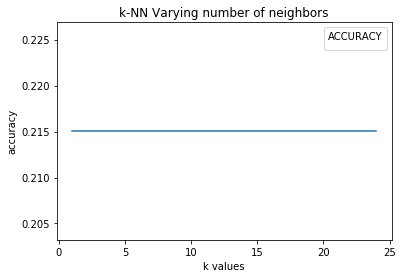

In [119]:
accuracy_list= []
for each in range(1,25):
    neigh_fit= KNeighborsClassifier(n_neighbors=each).fit(X_train,y_train)
    y_Prediction=neigh_fit.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test,yhat))

plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,25),accuracy_list)
plt.legend(loc='best',title="ACCURACY")
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()